In [1]:
!pip install ace_tools

In [2]:
!pip install statsmodels


In [3]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.9 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [5]:
import pandas as pd
import pingouin as pg
#from docx import Document
from google.colab import drive

# Mount and load data
drive.mount('/content/drive')
# Load file
file_path = '/content/drive/MyDrive/Colab Notebooks/All Data/HRV_Avg_Rmssd_P001_P031.csv'
df_long = pd.read_csv(file_path)
df_long






Mounted at /content/drive


,Subject,Treatment,Avg Rmssd
0,P001,Baseline,19.560000
1,P001,Silver,22.157500
2,P001,Placebo,23.986667
3,P001,22K Gold,22.620000
4,P002,Baseline,13.950000
...,...,...,...
119,P030,Silver,17.493333
120,P031,Baseline,35.440000
121,P031,Silver,25.530000
122,P031,Placebo,28.580000


In [6]:
# Pivot the now-unique data
df_wide = df_long.pivot(index='Subject', columns='Treatment', values='Avg Rmssd')
df_wide

Treatment,22K Gold,Baseline,Placebo,Silver
Subject,,,,
P001,22.620000,19.56,23.986667,22.157500
P002,13.925000,13.95,11.132500,15.857500
P003,9.752500,19.32,16.963333,15.107500
P004,38.730000,40.59,39.655000,36.655000
P005,19.377500,27.09,26.625000,25.127500
P006,24.615000,44.18,32.792500,14.987500
P007,86.845000,30.75,74.447500,25.795000
P008,55.167500,26.35,58.850000,47.570000
P009,22.395000,18.20,19.797500,36.085000


In [7]:
# Define treatment order
treatments = ['Baseline', '22K Gold', 'Silver', 'Placebo']
df_wide = df_wide[treatments]
df_wide

Treatment,Baseline,22K Gold,Silver,Placebo
Subject,,,,
P001,19.56,22.620000,22.157500,23.986667
P002,13.95,13.925000,15.857500,11.132500
P003,19.32,9.752500,15.107500,16.963333
P004,40.59,38.730000,36.655000,39.655000
P005,27.09,19.377500,25.127500,26.625000
P006,44.18,24.615000,14.987500,32.792500
P007,30.75,86.845000,25.795000,74.447500
P008,26.35,55.167500,47.570000,58.850000
P009,18.20,22.395000,36.085000,19.797500


In [8]:
# Compute pairwise differences
diffs = {}
pairs = [('Baseline', '22K Gold'), ('Baseline', 'Silver'), ('Baseline', 'Placebo'),
         ('22K Gold', 'Silver'), ('22K Gold', 'Placebo'), ('Silver', 'Placebo')]

for t1, t2 in pairs:
    col_name = f"{t1} - {t2}"
    diffs[col_name] = df_wide[t1] - df_wide[t2]

diff_df = pd.DataFrame(diffs)
diff_df

,Baseline - 22K Gold,Baseline - Silver,Baseline - Placebo,22K Gold - Silver,22K Gold - Placebo,Silver - Placebo
Subject,,,,,,
P001,-3.060000,-2.597500,-4.426667,0.462500,-1.366667,-1.829167
P002,0.025000,-1.907500,2.817500,-1.932500,2.792500,4.725000
P003,9.567500,4.212500,2.356667,-5.355000,-7.210833,-1.855833
P004,1.860000,3.935000,0.935000,2.075000,-0.925000,-3.000000
P005,7.712500,1.962500,0.465000,-5.750000,-7.247500,-1.497500
P006,19.565000,29.192500,11.387500,9.627500,-8.177500,-17.805000
P007,-56.095000,4.955000,-43.697500,61.050000,12.397500,-48.652500
P008,-28.817500,-21.220000,-32.500000,7.597500,-3.682500,-11.280000
P009,-4.195000,-17.885000,-1.597500,-13.690000,2.597500,16.287500


# Checking Assumptions

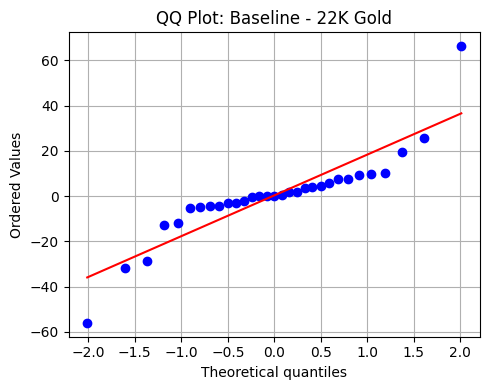

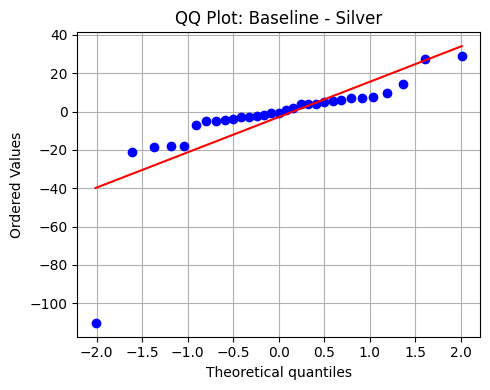

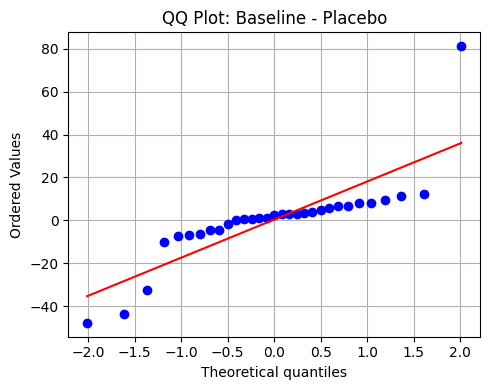

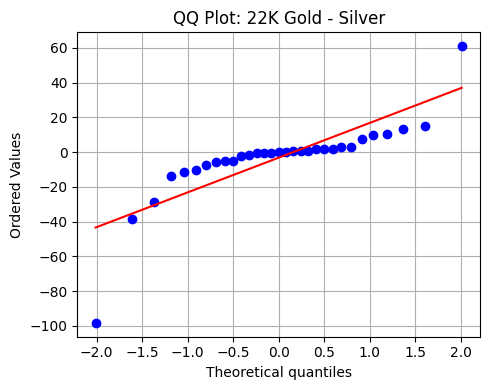

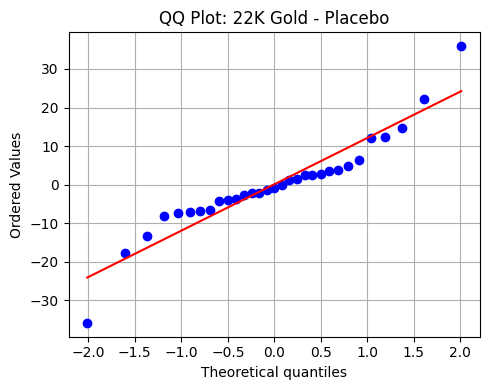

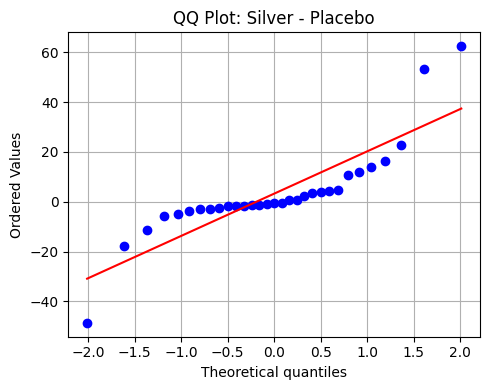

In [9]:
# Shapiro-Wilk test and QQ plots
shapiro_results = {}

for col in diff_df.columns:
    data = diff_df[col].dropna()
    stat, p = stats.shapiro(data)
    shapiro_results[col] = {'W': round(stat, 3), 'p-value': round(p, 3)}

    # QQ Plot
    plt.figure(figsize=(5, 4))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot: {col}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## Shapiro-Wilk Rest Results

In [10]:
# Display summary of Shapiro results
pd.DataFrame(shapiro_results).T.rename(columns={'W': 'Shapiro-W', 'p-value': 'p-value'})

,Shapiro-W,p-value
Baseline - 22K Gold,0.835,0.00
Baseline - Silver,0.634,0.00
Baseline - Placebo,0.720,0.00
22K Gold - Silver,0.712,0.00
22K Gold - Placebo,0.917,0.02
Silver - Placebo,0.785,0.00


In [11]:
# Reshape the dataframe to long format for plotting
diff_long = diff_df.melt(var_name='Difference', value_name='Score')
diff_long


,Difference,Score
0,Baseline - 22K Gold,-3.060000
1,Baseline - 22K Gold,0.025000
2,Baseline - 22K Gold,9.567500
3,Baseline - 22K Gold,1.860000
4,Baseline - 22K Gold,7.712500
...,...,...
181,Silver - Placebo,4.416667
182,Silver - Placebo,0.786667
183,Silver - Placebo,11.770000
184,Silver - Placebo,0.633333


## Outliers Check

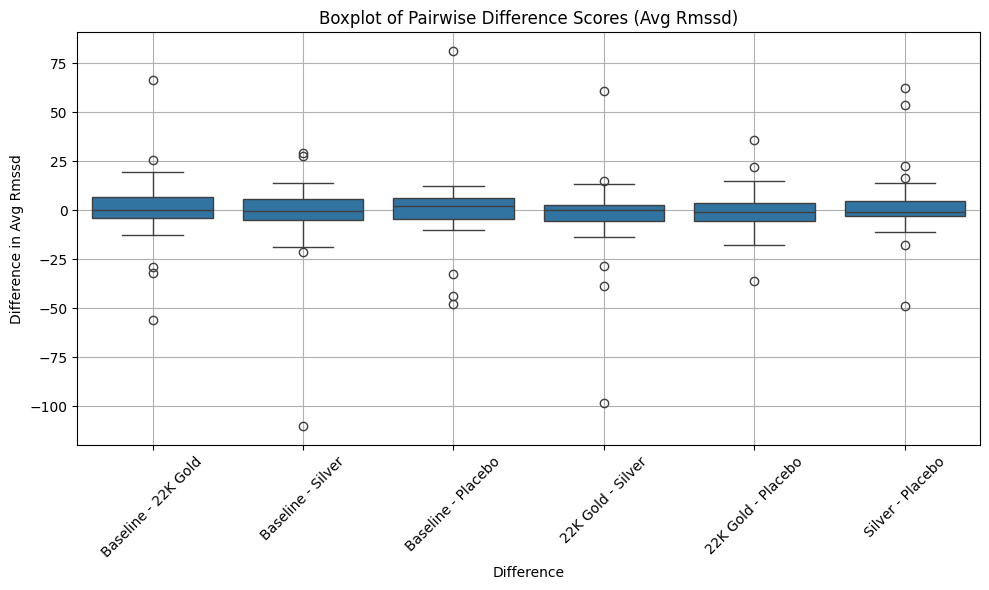

In [12]:
# Plot boxplots for each difference
plt.figure(figsize=(10, 6))
sns.boxplot(x='Difference', y='Score', data=diff_long)
plt.title('Boxplot of Pairwise Difference Scores (Avg Rmssd)')
plt.xticks(rotation=45)
plt.ylabel('Difference in Avg Rmssd')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
df_long

,Subject,Treatment,Avg Rmssd
0,P001,Baseline,19.560000
1,P001,Silver,22.157500
2,P001,Placebo,23.986667
3,P001,22K Gold,22.620000
4,P002,Baseline,13.950000
...,...,...,...
119,P030,Silver,17.493333
120,P031,Baseline,35.440000
121,P031,Silver,25.530000
122,P031,Placebo,28.580000


##  Mauchly’s Test Results

In [14]:
import pingouin as pg

# Run Mauchly’s Test of Sphericity directly on df_long
w_stat, p_value, chi2, dof, eps = pg.sphericity(data=df_long,
                                     dv='Avg Rmssd',
                                     subject='Subject',
                                     within='Treatment')

# Display results
print(" Mauchly’s Test of Sphericity:")
print(f" - W-statistic            : {round(w_stat, 4)}")
print(f" - p-value                : {round(p_value, 4)}")
print(f" - Greenhouse-Geisser ε  : {round(eps, 4)}")
print(f" - Chi-square statistic   : {round(chi2, 4)}")
print(f" - Degrees of freedom     : {dof}")


# Interpretation
if p_value < 0.05:
    print(" Sphericity is violated. Use correction (e.g., Greenhouse-Geisser) or multivariate tests.")
else:
    print(" Sphericity assumption holds. We can proceed with standard RM-ANOVA.")

 Mauchly’s Test of Sphericity:
 - W-statistic            : 0
 - p-value                : 0.503
 - Greenhouse-Geisser ε  : 0.0014
 - Chi-square statistic   : 19.7398
 - Degrees of freedom     : 5
 Sphericity assumption holds. We can proceed with standard RM-ANOVA.


# RM ANOVA Results (Including Pillai's trace, Wilks' lambda, Hotelling-Lawley trace, and Roy's greatest root)

In [15]:
# Repeated Measures ANOVA & Pairwise for Avg Rmssd
aov_sys = pg.rm_anova(dv='Avg Rmssd', within='Treatment', subject='Subject', data=df_long, detailed=True)

print(aov_sys)

      Source            SS  DF          MS         F     p-unc  p-GG-corr  \
0  Treatment    226.459243   3   75.486414  0.378895  0.768438   0.719414   
1      Error  17930.478085  90  199.227534       NaN       NaN        NaN   

        ng2       eps sphericity  W-spher   p-spher  
0  0.003148  0.783504      False  0.50295  0.001409  
1       NaN       NaN        NaN      NaN       NaN  


In [16]:
import pandas as pd
from statsmodels.multivariate.manova import MANOVA


# Add Subject column (statsmodels requires it in the formula data)
df_wide['Subject'] = df_wide.index.astype(str)

# Run MANOVA using statsmodels (Multivariate RM-ANOVA)
# Formula: each treatment score is treated as a separate dependent variable
maov = MANOVA.from_formula('Baseline + Q("22K Gold") + Silver + Placebo ~ 1', data=df_wide)

# Print multivariate tests (robust to sphericity and outliers)
print(" Multivariate RM-ANOVA Results (Robust Version):\n")
print(maov.mv_test())

 Multivariate RM-ANOVA Results (Robust Version):

                 Multivariate linear model
                                                            
------------------------------------------------------------
       Intercept        Value  Num DF  Den DF F Value Pr > F
------------------------------------------------------------
          Wilks' lambda 0.2456 4.0000 27.0000 20.7360 0.0000
         Pillai's trace 0.7544 4.0000 27.0000 20.7360 0.0000
 Hotelling-Lawley trace 3.0720 4.0000 27.0000 20.7360 0.0000
    Roy's greatest root 3.0720 4.0000 27.0000 20.7360 0.0000



/tmp/ipython-input-3314258056.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wide['Subject'] = df_wide.index.astype(str)


In [17]:
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.power import FTestPower

# Extract the test table
mv_test = maov.mv_test()
stats_table = mv_test.results['Intercept']['stat']

# Prepare effect size and power calculator
power_calc = FTestPower()
alpha = 0.05
df1 = int(stats_table.loc["Pillai's trace", 'Num DF'])
df2 = int(stats_table.loc["Pillai's trace", 'Den DF'])

# Define test keys and formulas for partial η² approximation
summary_rows = []
for test_name in ["Pillai's trace", "Wilks' lambda", "Hotelling-Lawley trace", "Roy's greatest root"]:
    value = stats_table.loc[test_name, 'Value']
    f_val = stats_table.loc[test_name, 'F Value']

    # Approximate partial eta squared based on the test
    if test_name == "Pillai's trace":
        eta2 = value
    elif test_name == "Wilks' lambda":
        eta2 = 1 - value
    elif test_name == "Hotelling-Lawley trace":
        eta2 = value / (value + df2)
    elif test_name == "Roy's greatest root":
        eta2 = value / (value + df2)

    # Compute effect size and power
    f_effect = np.sqrt(eta2 / (1 - eta2))
    ncp = f_val * df2
    try:
        power = power_calc.solve_power(effect_size=f_effect, df_num=df1, df_denom=df2, alpha=alpha)
    except:
        power = np.nan

    summary_rows.append({
        "Test": test_name,
        "Statistic": round(value, 4),
        "F Value": round(f_val, 4),
        "df1": df1,
        "df2": df2,
        "Partial η²": round(eta2, 4),
        "Noncentral λ": round(ncp, 2),
        "Observed Power": round(power, 4)
    })

# Create and display the summary table
summary_df = pd.DataFrame(summary_rows)
print("\n Multivariate RM-ANOVA: Summary for All 4 Tests")
print(summary_df.to_markdown(index=False))


 Multivariate RM-ANOVA: Summary for All 4 Tests
| Test                   |   Statistic |   F Value |   df1 |   df2 |   Partial η² |   Noncentral λ |   Observed Power |
|:-----------------------|------------:|----------:|------:|------:|-------------:|---------------:|-----------------:|
| Pillai's trace         |      0.7544 |    20.736 |     4 |    27 |       0.7544 |         559.87 |           0.4745 |
| Wilks' lambda          |      0.2456 |    20.736 |     4 |    27 |       0.7544 |         559.87 |           0.4745 |
| Hotelling-Lawley trace |      3.072  |    20.736 |     4 |    27 |       0.1022 |         559.87 |           0.0622 |
| Roy's greatest root    |      3.072  |    20.736 |     4 |    27 |       0.1022 |         559.87 |           0.0622 |


# Pairwise Comparision

In [18]:
from scipy import stats

# Run pairwise comparisons
pairwise_sys = pg.pairwise_tests(
    dv='Avg Rmssd',
    within='Treatment',
    subject='Subject',
    data=df_long,
    padjust='bonf',
    parametric=True,
    effsize='hedges'
)

# Create pivoted wide format to compute per-subject differences
pivot = df_long.pivot(index='Subject', columns='Treatment', values='Avg Rmssd')

# Manually compute Mean Diff, Std Error, and CI for each row
mean_diffs = []
std_errors = []
ci_lowers = []
ci_uppers = []

confidence = 0.95
alpha = 1 - confidence

for i, row in pairwise_sys.iterrows():
    A = row['A']
    B = row['B']

    diffs = pivot[A] - pivot[B]
    mean_diff = diffs.mean()
    std_err = stats.sem(diffs)
    df = len(diffs) - 1
    t_crit = stats.t.ppf(1 - alpha/2, df)

    ci_low = mean_diff - t_crit * std_err
    ci_high = mean_diff + t_crit * std_err

    mean_diffs.append(round(mean_diff, 4))
    std_errors.append(round(std_err, 4))
    ci_lowers.append(round(ci_low, 4))
    ci_uppers.append(round(ci_high, 4))

# Add these columns to the original pairwise dataframe
pairwise_sys['Mean Diff'] = mean_diffs
pairwise_sys['Std Error'] = std_errors
pairwise_sys['95% CI Lower'] = ci_lowers
pairwise_sys['95% CI Upper'] = ci_uppers

# Create reversed pairs
reversed_rows = pairwise_sys.copy()
reversed_rows['A'], reversed_rows['B'] = pairwise_sys['B'], pairwise_sys['A']
reversed_rows['Mean Diff'] = -pairwise_sys['Mean Diff']
reversed_rows['T'] = -pairwise_sys['T']
reversed_rows['hedges'] = -pairwise_sys['hedges']
reversed_rows['95% CI Lower'] = -pairwise_sys['95% CI Upper']
reversed_rows['95% CI Upper'] = -pairwise_sys['95% CI Lower']
# Std Error, p-values, dof, p-corr, BF10 remain the same

# Concatenate original and reversed, sort
pairwise_full = pd.concat([pairwise_sys, reversed_rows], ignore_index=True)
pairwise_full = pairwise_full.sort_values(by=['A', 'B']).reset_index(drop=True)

# Display final table
cols_to_show = [
    'A', 'B', 'T', 'dof', 'p-unc', 'p-corr',
    'Mean Diff', 'Std Error', '95% CI Lower', '95% CI Upper', 'hedges'
]

print("\n Full Pairwise Comparisons (Original + Reversed Orders):\n")
print(pairwise_full[cols_to_show].to_markdown(index=False))



 Full Pairwise Comparisons (Original + Reversed Orders):

| A        | B        |          T |   dof |    p-unc |   p-corr |   Mean Diff |   Std Error |   95% CI Lower |   95% CI Upper |      hedges |
|:---------|:---------|-----------:|------:|---------:|---------:|------------:|------------:|---------------:|---------------:|------------:|
| 22K Gold | Baseline | -0.0888394 |    30 | 0.9298   |        1 |     -0.3103 |      3.4928 |        -7.4435 |         6.8229 | -0.0126898  |
| 22K Gold | Placebo  |  0.0396213 |    30 | 0.968658 |        1 |      0.0873 |      2.2043 |        -4.4145 |         4.5892 |  0.00429182 |
| 22K Gold | Silver   | -0.750473  |    30 | 0.458816 |        1 |     -3.1765 |      4.2327 |       -11.8209 |         5.4678 | -0.12143    |
| Baseline | 22K Gold |  0.0888394 |    30 | 0.9298   |        1 |      0.3103 |      3.4928 |        -6.8229 |         7.4435 |  0.0126898  |
| Baseline | Placebo  |  0.107096  |    30 | 0.915426 |        1 |      0.3976 |   

# Descriptive Statistics

In [19]:
#  Descriptive summary for Avg Rmssd
desc_table = df_long.groupby('Treatment')['Avg Rmssd'].agg(
    Mean='mean',
    Std_Dev='std',
    N='count'
).reset_index()

#  Round for clean display
desc_table['Mean'] = desc_table['Mean'].round(2)
desc_table['Std_Dev'] = desc_table['Std_Dev'].round(2)

# Print summary
print("\n Descriptive Statistics for Avg Rmssd:\n")
print(desc_table.to_markdown(index=False))



 Descriptive Statistics for Avg Rmssd:

| Treatment   |   Mean |   Std_Dev |   N |
|:------------|-------:|----------:|----:|
| 22K Gold    |  31.52 |     21.43 |  31 |
| Baseline    |  31.83 |     26.59 |  31 |
| Placebo     |  31.43 |     18.67 |  31 |
| Silver      |  34.7  |     29.59 |  31 |
